C:\Users\matur\AppData\Local\Temp\ipykernel_6116\1274108405.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, ax=axs[2, 0], palette="Blues_d")


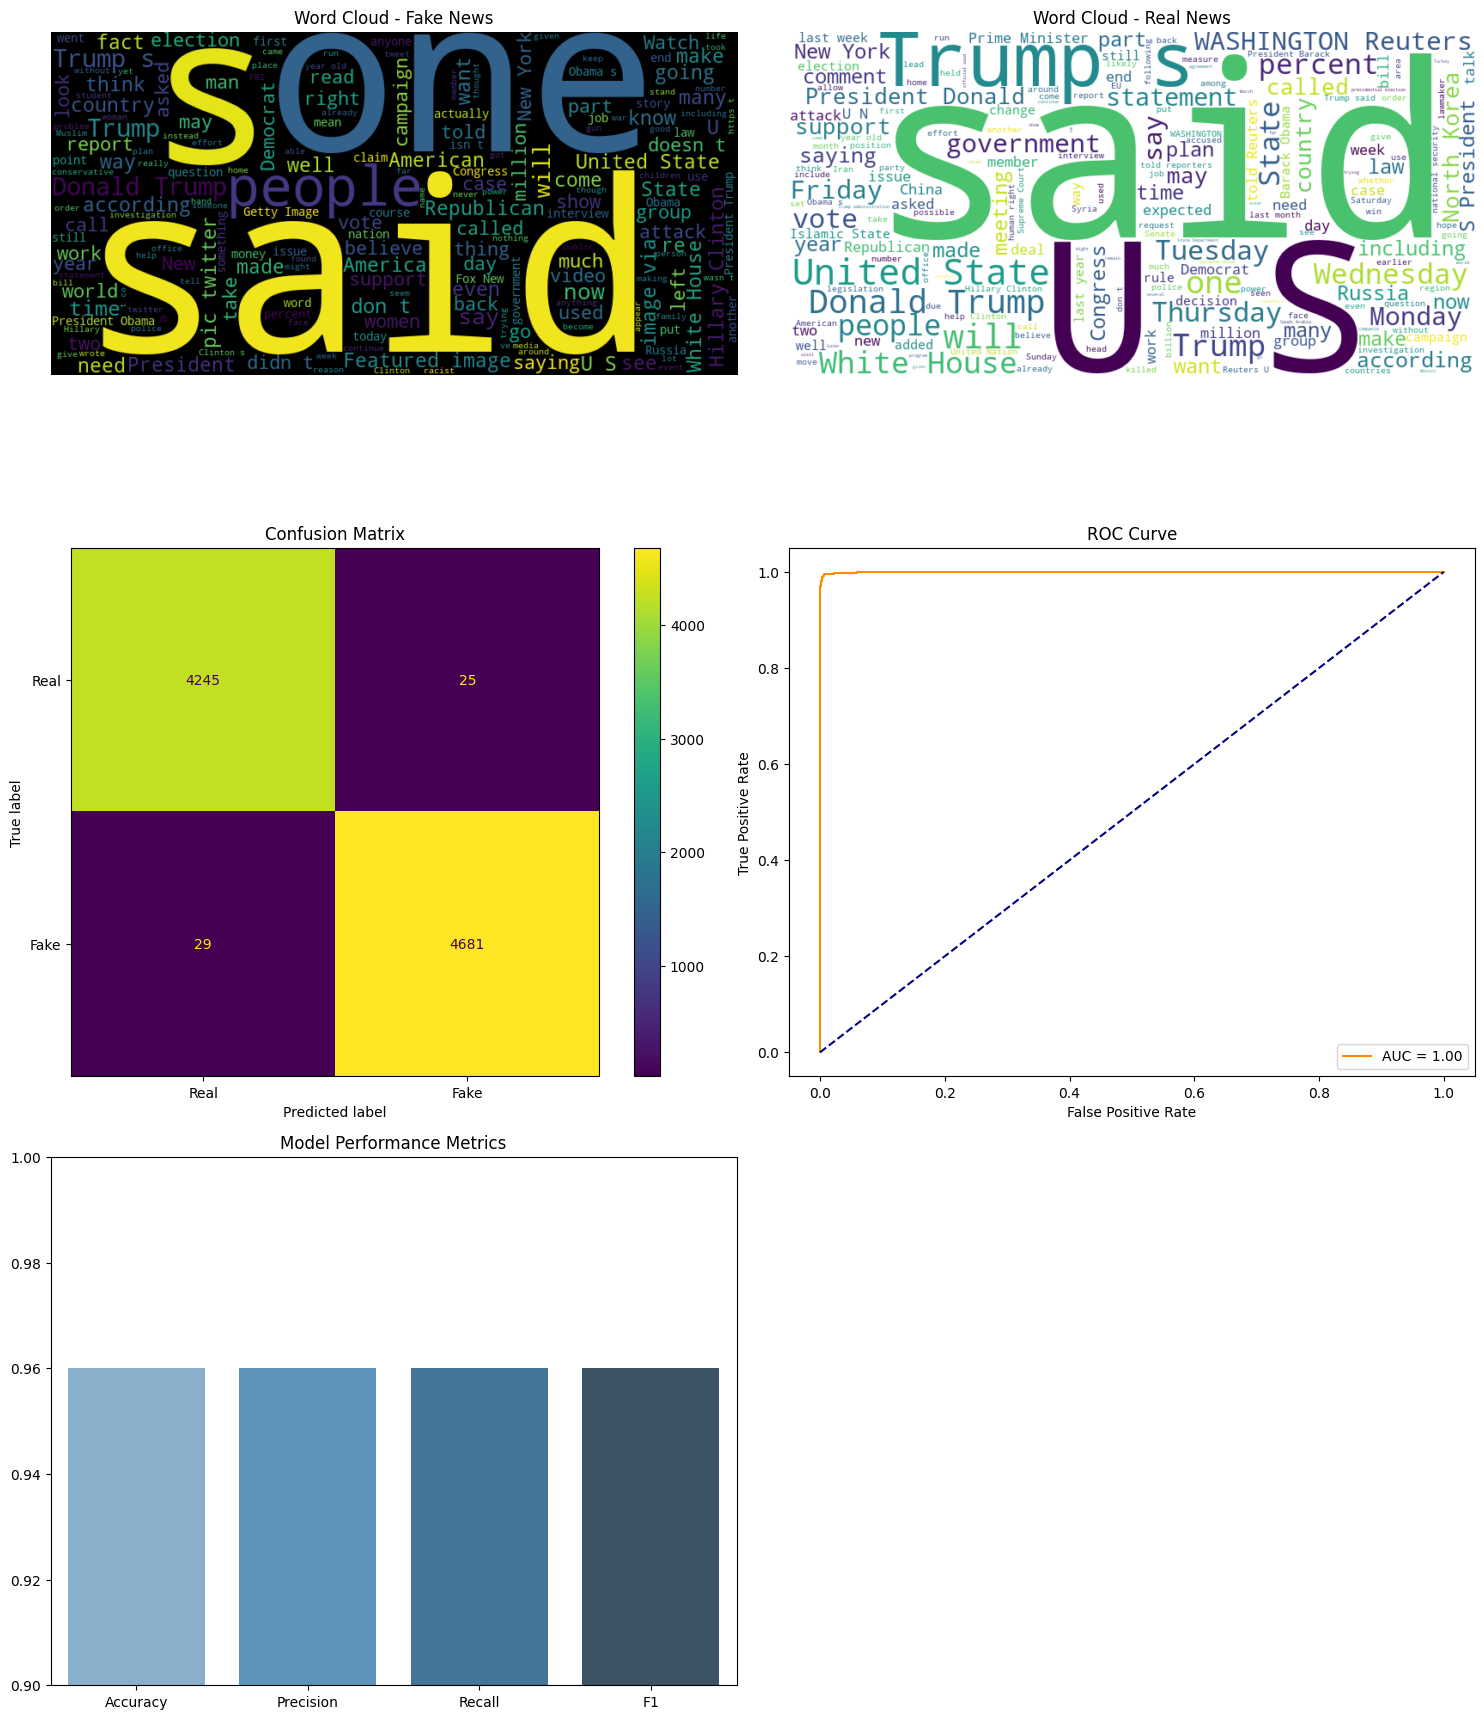

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from wordcloud import WordCloud
import seaborn as sns

# Load from local files (make sure these files exist in the same directory)
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# Add labels
fake["label"] = 1
true["label"] = 0

# Merge datasets
df = pd.concat([fake, true]).sample(frac=1, random_state=42).reset_index(drop=True)
df = df[["text", "label"]].dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# Vectorize
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Real", "Fake"])

# ROC curve
y_score = model.decision_function(X_test_tfidf)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Word clouds
wc_fake = WordCloud(width=800, height=400, background_color='black').generate(" ".join(fake["text"].dropna()))
wc_true = WordCloud(width=800, height=400, background_color='white').generate(" ".join(true["text"].dropna()))

# Bar metrics
metrics = ["Accuracy", "Precision", "Recall", "F1"]
values = [0.96, 0.96, 0.96, 0.96]  # or use actual metrics if calculated

# Plot
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

axs[0, 0].imshow(wc_fake, interpolation="bilinear")
axs[0, 0].axis("off")
axs[0, 0].set_title("Word Cloud - Fake News")

axs[0, 1].imshow(wc_true, interpolation="bilinear")
axs[0, 1].axis("off")
axs[0, 1].set_title("Word Cloud - Real News")

cmd.plot(ax=axs[1, 0])
axs[1, 0].set_title("Confusion Matrix")

axs[1, 1].plot(fpr, tpr, color='darkorange', label=f"AUC = {roc_auc:.2f}")
axs[1, 1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1, 1].set_xlabel("False Positive Rate")
axs[1, 1].set_ylabel("True Positive Rate")
axs[1, 1].set_title("ROC Curve")
axs[1, 1].legend()

sns.barplot(x=metrics, y=values, ax=axs[2, 0], palette="Blues_d")
axs[2, 0].set_ylim(0.9, 1.0)
axs[2, 0].set_title("Model Performance Metrics")

axs[2, 1].axis('off')
plt.tight_layout()
plt.show()